In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
n = 2
m = 10

x = np.ones((m,n))
y = np.ones(m)
theta = np.ones(n)
for i in range(0,m):
    for j in range(1,n):
        x[i][j] = i*j
        y[i] += i*j*3
        
# y = y.reshape( (m, 1) )

[[ 1.  0.]
 [ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]]
[  1.   4.   7.  10.  13.  16.  19.  22.  25.  28.]


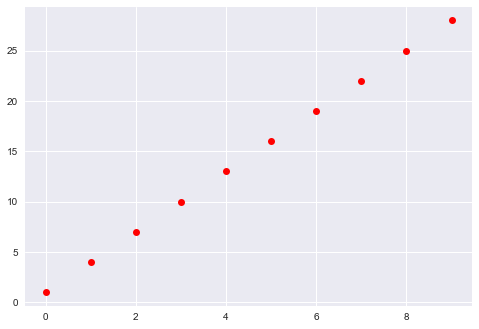

In [4]:
print(x)
print(y)
plt.plot(x[:,1], y, 'ro')

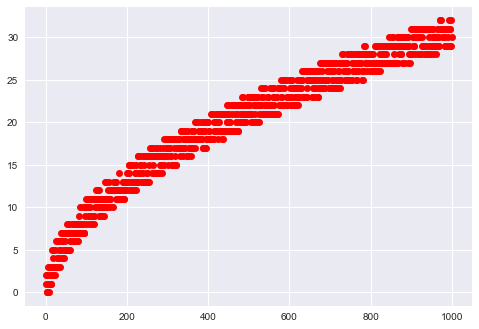

In [87]:
noiseSize = 2
size = 1000

sample = np.arange(size*2).reshape( (2, size) )
sample[1] = np.sqrt(sample)[0]
sample[1] = sample[1] + (np.random.rand(1,size) - .5) * noiseSize*2
sample = sample.T

plt.plot(sample[:,0], sample[:,1], 'ro')

In [88]:
data = sample
n = 2
m = data.shape[0]

x = data[:, :n-1]
x = np.concatenate((np.ones((1,m)), x.T)).T

y = np.array( data[:,-1] )
y = y.reshape( (m, 1) )

0.0
theta: [[  4.67968600e-06   1.44990217e-03]
 [  9.35937199e-06   2.89980434e-03]
 [  0.00000000e+00   0.00000000e+00]
 ..., 
 [  1.35710894e-04   4.20471629e-02]
 [  1.49749952e-04   4.63968694e-02]
 [  1.40390580e-04   4.34970651e-02]]


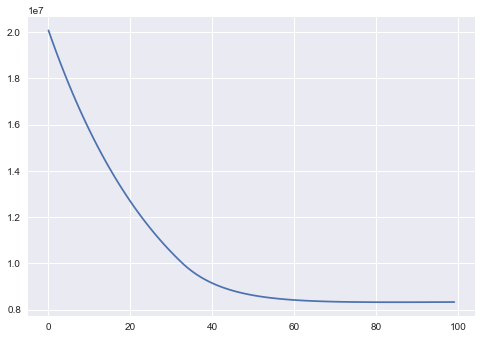

In [96]:
iterCount = 100
alpha = 0.0000001
theta = np.array(n * [0])


j = []

print(x[:,1].min())

for _ in range(0, iterCount):
    h = np.dot(x , theta.T).T
    loss = h - y
    j += [ abs(np.array(loss)).sum() ]
    gradient = np.dot(loss , x)
    theta = theta - alpha * gradient / m
    
print('theta:', theta )
plt.plot(j)